In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('../dataset/csv/churn_prediction.csv')

In [3]:
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03


In [4]:
data.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn',
       'last_transaction'],
      dtype='object')

In [5]:
data.shape

(28382, 21)

In [6]:
data.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
last_transaction                   object
dtype: object

In [8]:
data['gender'].value_counts()

Male      16548
Female    11309
Name: gender, dtype: int64

In [9]:
data['gender'].value_counts()/sum(data['gender'].value_counts().values)

Male      0.594034
Female    0.405966
Name: gender, dtype: float64

In [11]:
sum(data['gender'].value_counts().values)

27857

In [12]:
16548/27857

0.5940338155580285

In [13]:
data['gender'].value_counts(normalize=True)

Male      0.594034
Female    0.405966
Name: gender, dtype: float64

In [14]:
data['occupation'].nunique()

5

In [15]:
data['occupation'].value_counts()

self_employed    17476
salaried          6704
student           2058
retired           2024
company             40
Name: occupation, dtype: int64

In [16]:
data['occupation'].value_counts(normalize=True)

self_employed    0.617483
salaried         0.236874
student          0.072716
retired          0.071514
company          0.001413
Name: occupation, dtype: float64

Text(0.5, 1.0, 'Bar plot for Gender of Customers')

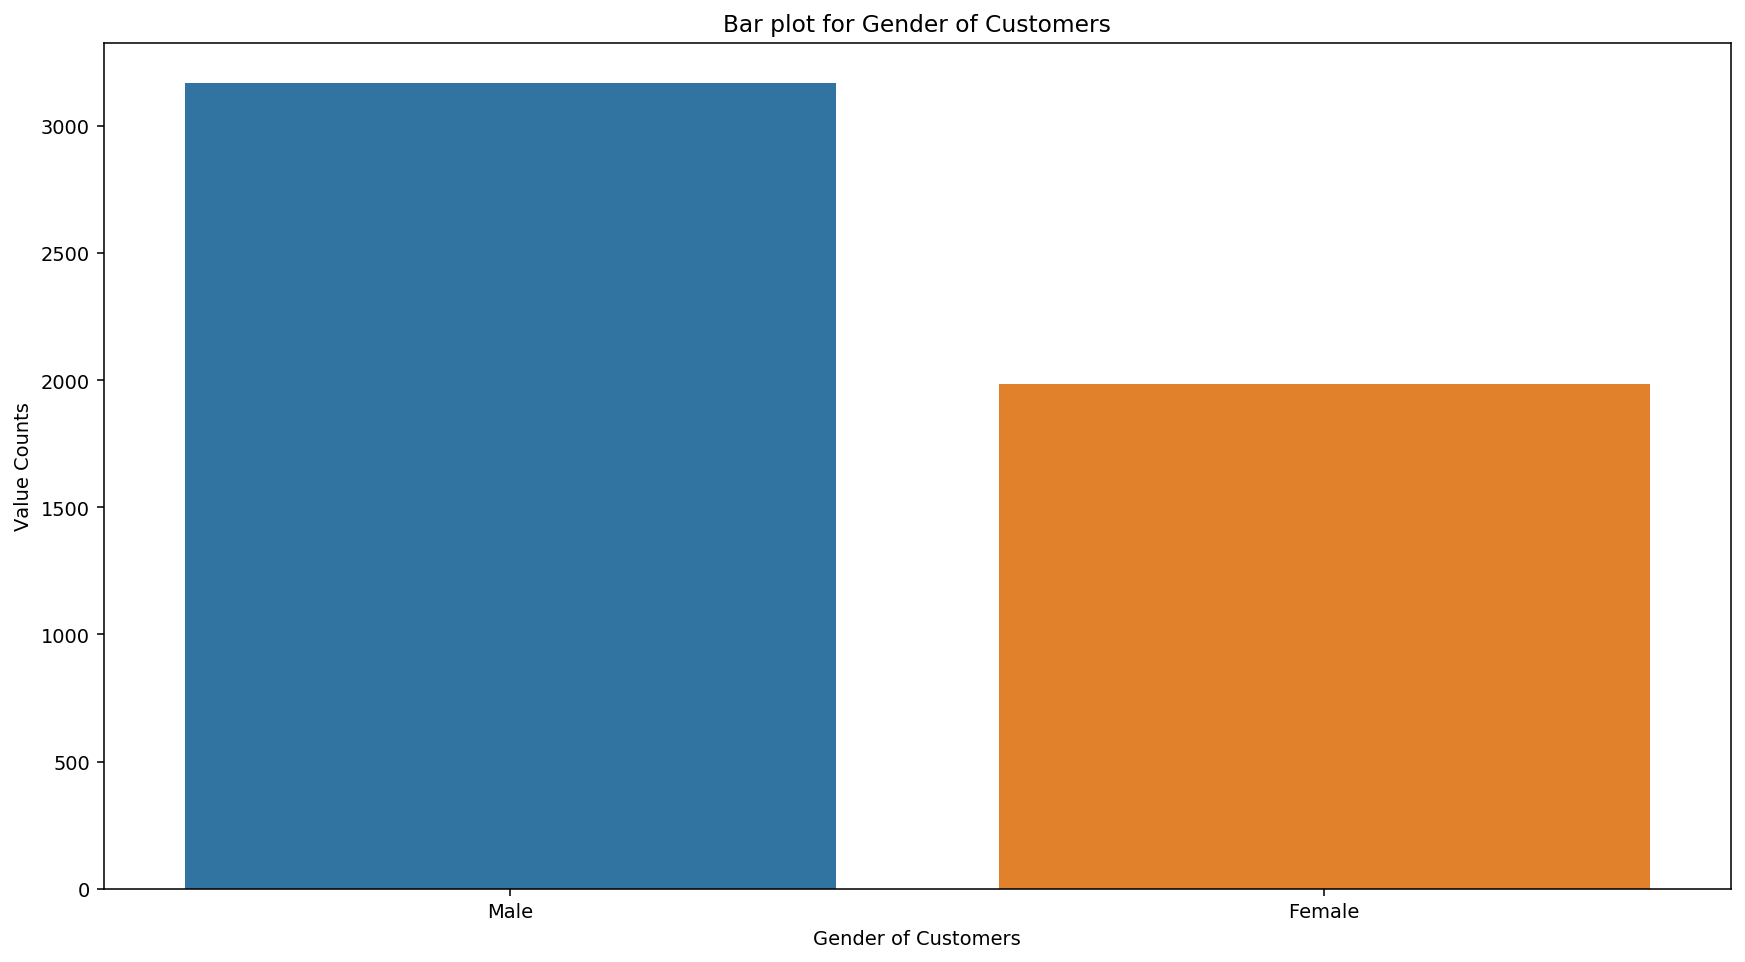

In [30]:
plt.figure(figsize=(15,8), dpi=140)
sns.barplot(x=data[data['churn']==1]['gender'].value_counts().index, 
            y=data[data['churn']==1]['gender'].value_counts().values)
plt.xlabel('Gender of Customers')
plt.ylabel('Value Counts')
plt.title('Bar plot for Gender of Customers')


In [26]:
data[data['churn']==1]['gender'].value_counts().values

array([3169, 1985], dtype=int64)

In [28]:
data[data['churn']==1]['gender'].value_counts().index

Index(['Male', 'Female'], dtype='object')

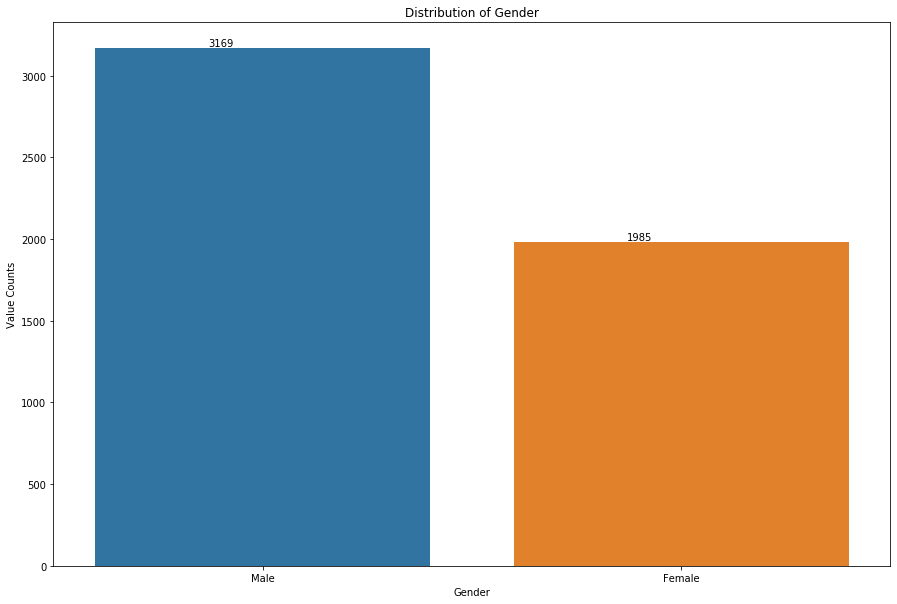

In [31]:
plt.figure(figsize=(15, 10))
ax = sns.barplot(x=data[data['churn']==1]['gender'].value_counts().index, 
            y=data[data['churn']==1]['gender'].value_counts().values)
plt.xlabel('Gender')
plt.ylabel('Value Counts')
plt.title('Distribution of Gender')
for p in ax.patches:
    ax.annotate('{:1.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')

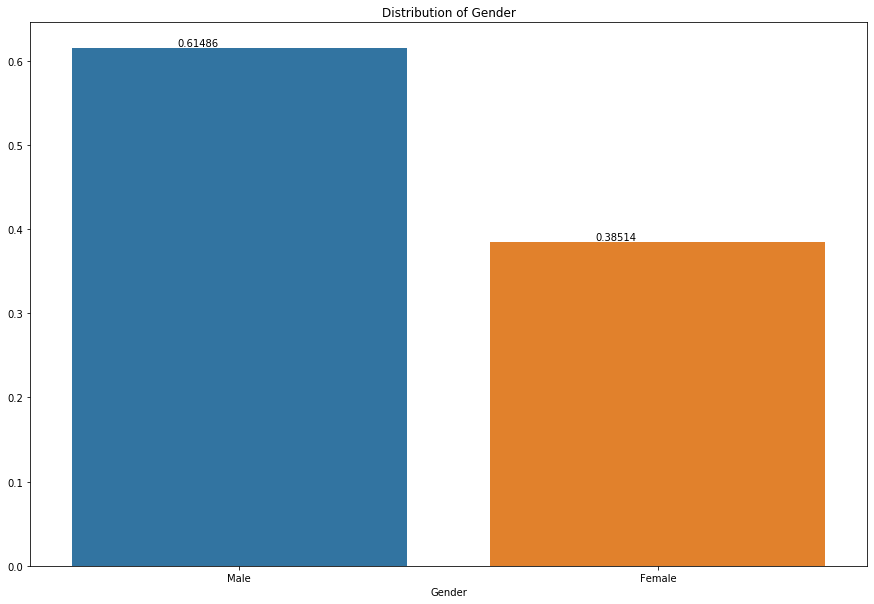

In [32]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x=data[data['churn']==1]['gender'].value_counts().index, 
           y=data[data['churn']==1]['gender'].value_counts(normalize=True).values)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
for p in ax.patches:
        ax.annotate('{:1.5f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')

Text(0.5, 1.0, 'Bar plot for Occupation of Customers')

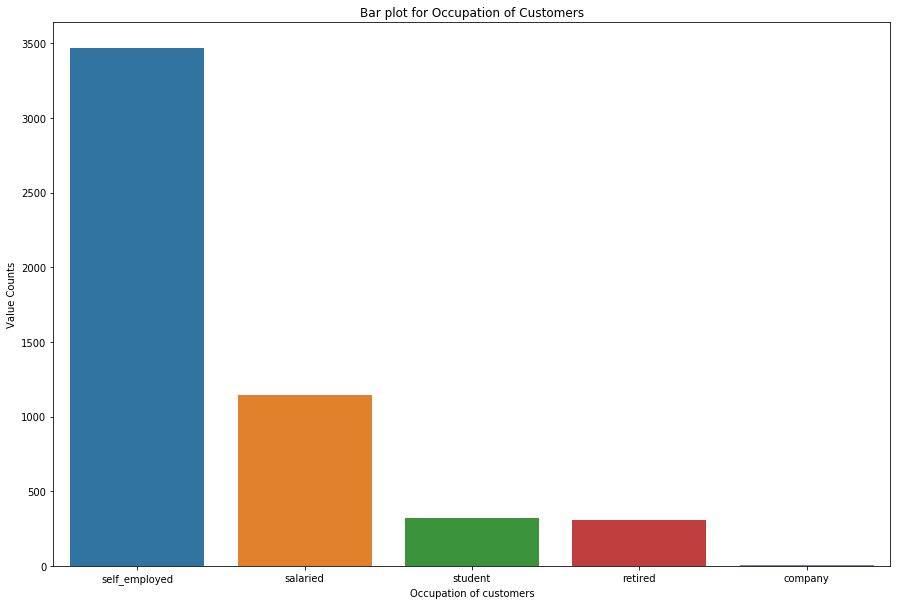

In [37]:
plt.figure(figsize=(15,10))
sns.barplot(x=data[data['churn']==1]['occupation'].value_counts().index,
           y=data[data['churn']==1]['occupation'].value_counts().values)
plt.xlabel('Occupation of customers')
plt.ylabel('Value Counts')
plt.title('Bar plot for Occupation of Customers')

In [35]:
data[data['churn']==1]['occupation'].value_counts().index

Index(['self_employed', 'salaried', 'student', 'retired', 'company'], dtype='object')

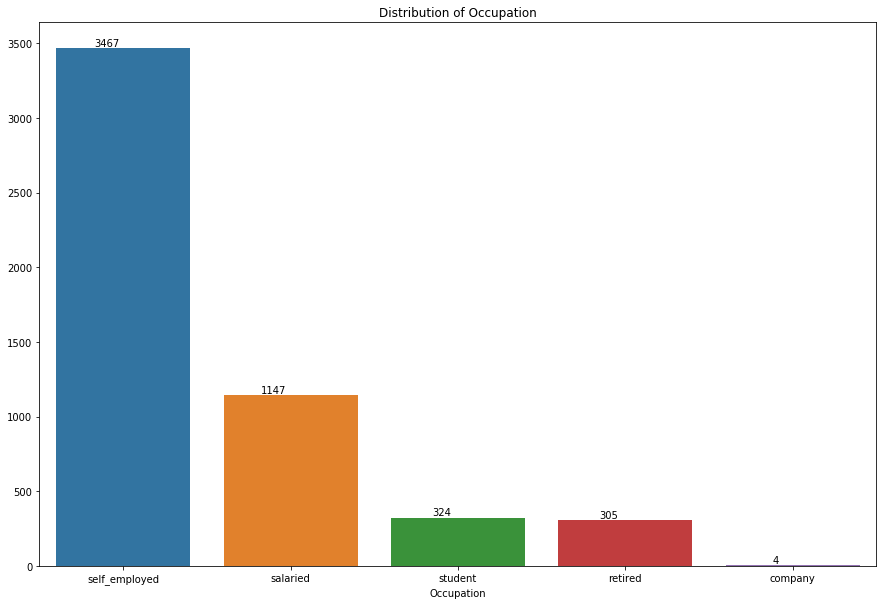

In [39]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x=data[data['churn']==1]['occupation'].value_counts().index,
           y=data[data['churn']==1]['occupation'].value_counts().values)
plt.xlabel('Occupation')
plt.title('Distribution of Occupation')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')

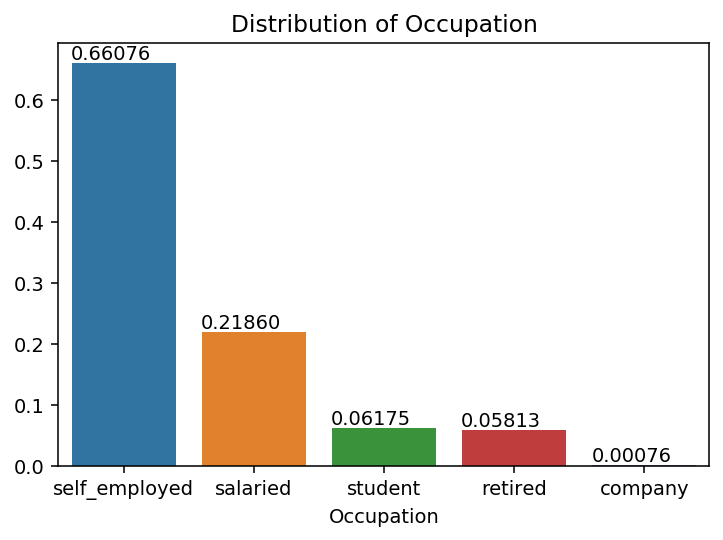

In [40]:
plt.figure(dpi = 140)
ax = sns.barplot(x=data[data['churn']==1]['occupation'].value_counts().index, y = data[data['churn']==1]['occupation'].value_counts(normalize=True).values, orient = 'v')
plt.title('Distribution of Occupation')
plt.xlabel('Occupation')

for p in ax.patches:
        ax.annotate('{:1.5f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
        
plt.show()

In [42]:
data.select_dtypes(exclude=['int64', 'float64', 'int64']).dtypes

gender              object
occupation          object
last_transaction    object
dtype: object

In [51]:
def UVA_category(data, var_groups):
    '''
    Univariate_Analysis_categorical
    takes a group of variables (category) and plot/print all the value_counts and barplot.
    '''
    
    size = len(var_groups)
    plt.figure(figsize=(10*size, 10), dpi=100)
    
    for j, i in enumerate(var_groups):
        norm_count = data[i].value_counts(normalize=True)
        n_uni = data[i].nunique()
        
        plt.subplot(1,size,j+1)
        sns.barplot(norm_count, norm_count.index , order = norm_count.index)
        plt.xlabel('fraction/percent', fontsize = 20)
        plt.ylabel('{}'.format(i), fontsize = 20)
        plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))
    

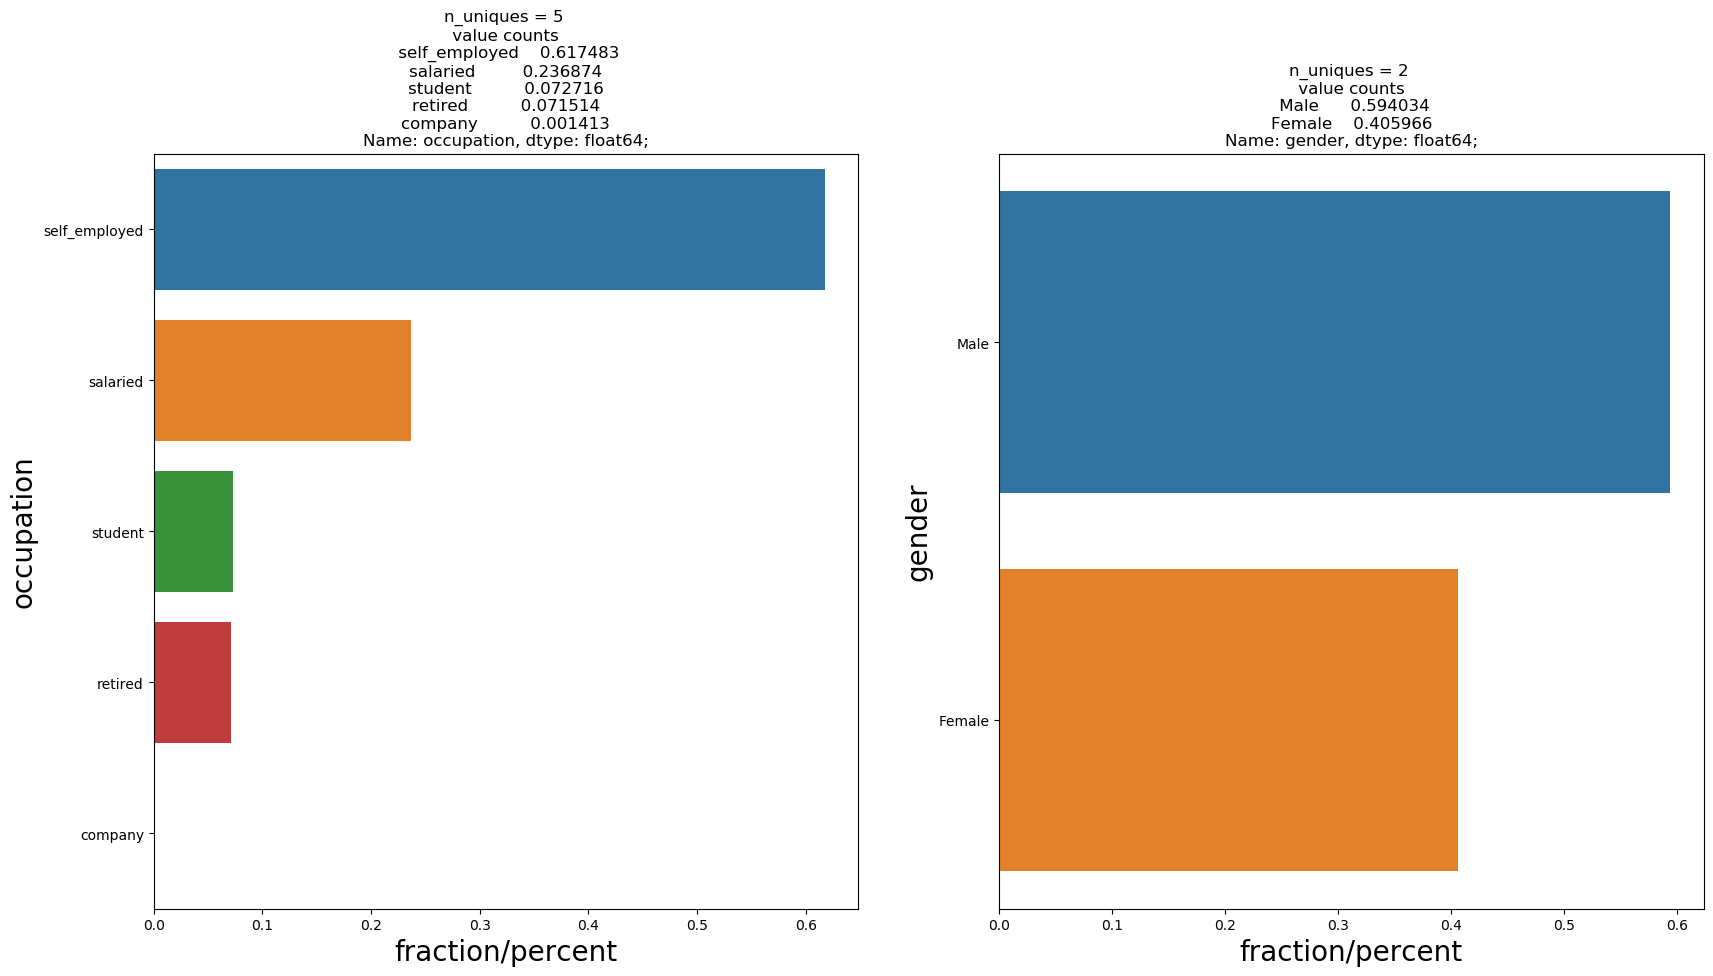

In [52]:
UVA_category(data, ['occupation', 'gender'])

(0, 0.02)

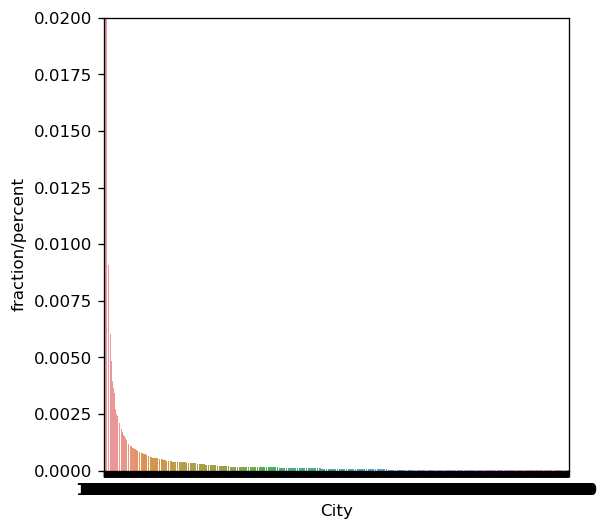

In [55]:
#Plotting "city"
plt.figure(figsize = (5,5), dpi = 120)
city_count = data['city'].value_counts(normalize=True)
sns.barplot(city_count.index, city_count , order = city_count.index)
plt.xlabel('City')
plt.ylabel('fraction/percent')
plt.ylim(0,0.02)

Text(0, 0.5, 'fraction/percent')

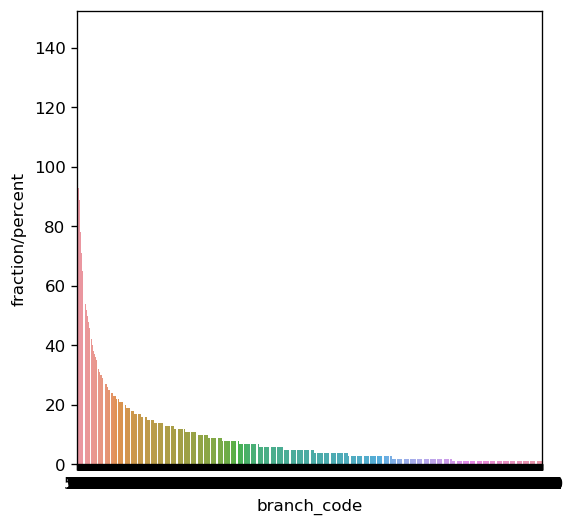

In [56]:
#Plotting "branch_code"
plt.figure(figsize = (5,5), dpi = 120)
branch_count = data['branch_code'].value_counts()
sns.barplot(branch_count.index, branch_count , order = branch_count.index)
plt.xlabel('branch_code')
plt.ylabel('fraction/percent')
#plt.ylim(0,0.02)

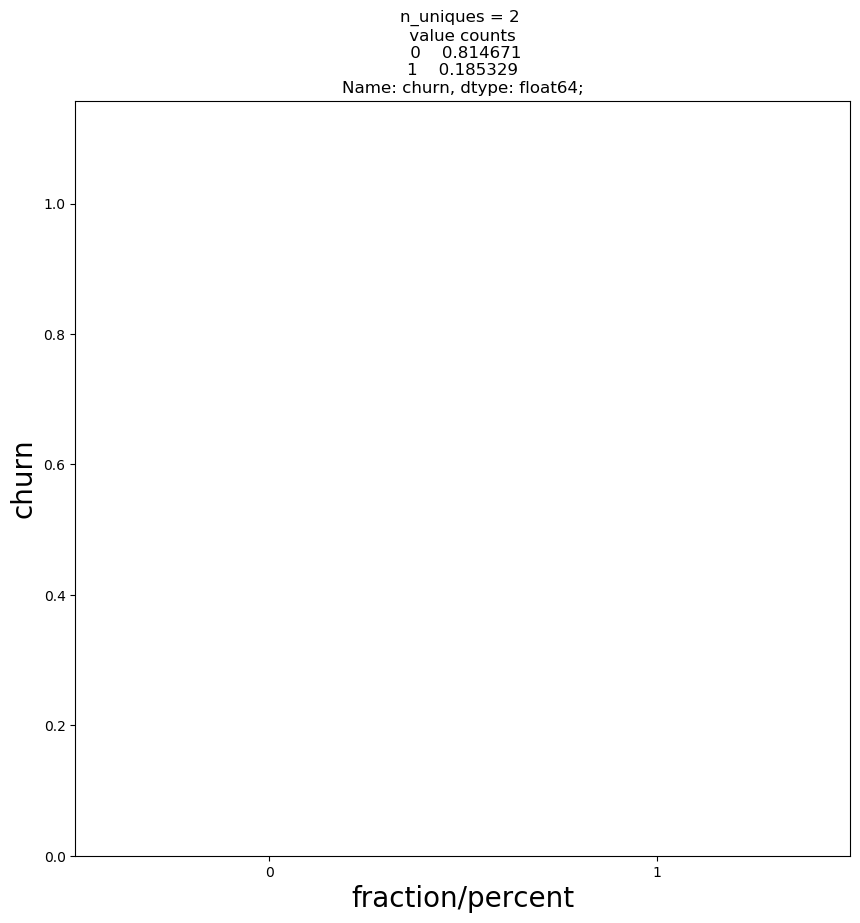

In [59]:
UVA_category(data, ['churn'])